In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import foregrounds as fg
import experiments as exp
from cosmo import CosmoCalc
import hlc

In [2]:
components = ['radio', 'cib', 'tsz', 'tsz_cib']
experiment = 's4wide'
l, cl_residual, res_ilc_dic, weights = hlc.residuals_and_weights(components = components, experiment = experiment)

/Users/kevinlevy/Documents/codes/master_thesis/code/experiments.py:127: RuntimeWarning: divide by zero encountered in power
  nl_red = n_red*(l/elknee)**alphaknee
/Users/kevinlevy/Documents/codes/master_thesis/code/experiments.py:131: RuntimeWarning: divide by zero encountered in power
  nl_red2= n_red2*(l/elknee2)**alphaknee2
/Users/kevinlevy/Documents/codes/master_thesis/code/foregrounds.py:82: RuntimeWarning: divide by zero encountered in true_divide
  cl_rg = (2*np.pi)/(l * (l+1))*dl_rg
/Users/kevinlevy/Documents/codes/master_thesis/code/foregrounds.py:82: RuntimeWarning: invalid value encountered in multiply
  cl_rg = (2*np.pi)/(l * (l+1))*dl_rg
/Users/kevinlevy/Documents/codes/master_thesis/code/foregrounds.py:112: RuntimeWarning: divide by zero encountered in true_divide
  cl_cib =  (2*np.pi)/(l * (l+1)) * dl_cib
/Users/kevinlevy/Documents/codes/master_thesis/code/foregrounds.py:112: RuntimeWarning: invalid value encountered in multiply
  cl_cib =  (2*np.pi)/(l * (l+1)) * dl_cib

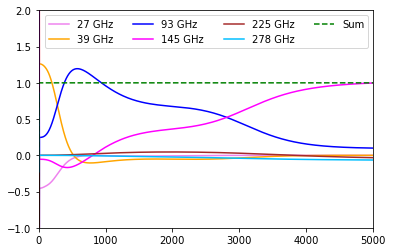

In [5]:
plt.plot(l, weights[0], label = '27 GHz', color = 'violet')
plt.plot(l, weights[1], label = '39 GHz', color = 'orange')
plt.plot(l, weights[2], label = '93 GHz', color = 'blue')
plt.plot(l, weights[3], label = '145 GHz', color = 'magenta')
plt.plot(l, weights[4], label = '225 GHz', color = 'brown')
plt.plot(l, weights[5], label = '278 GHz', color = 'deepskyblue')
tot = np.asarray(weights[0])+np.asarray(weights[1])+np.asarray(weights[2])+np.asarray(weights[3])+np.asarray(weights[4])+np.asarray(weights[5])
plt.plot(l, tot, label = 'Sum', color = 'green', ls = '--')
plt.xlim(0, 5000)
plt.ylim(-1., 2.)
plt.legend(ncol=4)

/Users/kevinlevy/Documents/codes/master_thesis/code/cosmo.py:84: RuntimeWarning: invalid value encountered in true_divide
  cl = dl * 2 * np.pi / (l*(l+1))


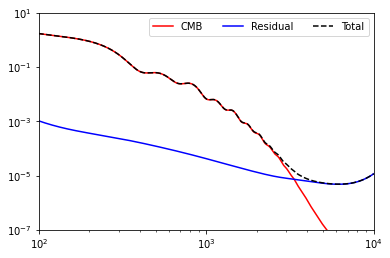

In [4]:
l, cl = CosmoCalc().cmb_power_spectrum()
l, cl_ksz = fg.get_foreground_power_spt('kSZ')
plt.subplot(xscale = 'log', yscale = 'log')
plt.plot(l, cl, label = 'CMB', color = 'red')
plt.plot(l, cl_residual, label = 'Residual', color = 'blue')
plt.plot(l, cl+cl_residual, label = 'Total', color = 'black', ls = '--')
plt.xlim(100, 10000)
plt.ylim(1e-7,1e1)
plt.legend(ncol=3)

In [29]:
import lensing_estimator
import stats

sims_for_covariance =[]
l, cl = CosmoCalc().cmb_power_spectrum()
maps_clus = sims.cmb_mock_data(10, [240,0.25,240,0.25], l, cl)
_, dipole_profile, _ = lensing_estimator.get_dipole_profile([240,0.25,240,0.25], maps_clus, maps_rand, l, cl, cl_noise = cl)
sims_for_covariance.append(dipole_profile) 
nber_pixels = 10/0.25
cov, corr = stats.covariance_matrix(sims_for_covariance, int(nber_pixels))
print(cov)

491.95916482111124


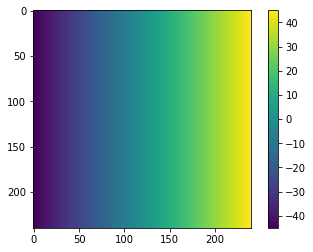

In [31]:
import tools
grid, _ = tools.make_grid([240,0.25,240,0.25])
X,Y = grid
plt.imshow(1.5*X)
plt.colorbar()

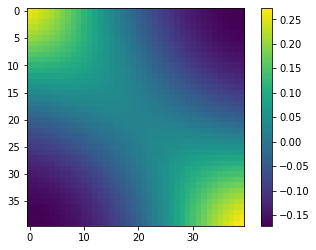

In [32]:
#covariance_matrix, correlation_matrix = lensing_estimator.covariance_matrix(nber_clus, nber_rand, nber_cov, map_params,  l, cl, bl = bl, nl = nl, cl_noise = cl_noise)
with open('covariance_matrix.npy', 'rb') as file:
       co = np.load(file)   
plt.imshow(co)
plt.colorbar()

<ErrorbarContainer object of 3 artists>

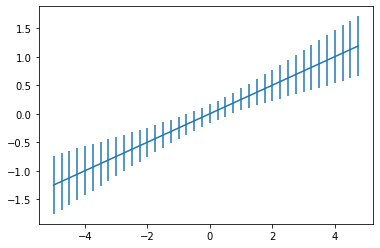

In [43]:
x = np.arange(-5,5, 0.25)
y = np.arange(-5,5,0.25)
plt.errorbar(x, y/4, np.sqrt(np.diagonal(co)))